In [2]:
pip install ucimlrepo

In [58]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
data  = student_performance.data.features
target = student_performance.data.targets

# metadata
print(student_performance.metadata)

# variable information
print(student_performance.variables)

{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'published_in': 'Proceedings of 5th Annual Future Business Technology Conference', 'year'

In [59]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,yes,no,5,4,2,1,2,5,4
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,yes,no,4,3,4,1,1,1,4
646,MS,F,18,U,GT3,T,1,1,other,other,...,yes,no,no,1,1,1,1,1,5,6
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,6


In [60]:
target

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13
...,...,...,...
644,10,11,10
645,15,15,16
646,11,12,9
647,10,10,10


In [62]:
# Step 2: Characterization
print("Characterization:")
print(data.describe())

Characterization:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      

In [63]:
# Selecting a range of columns using slicing
# X_df = X.loc[:, 1:5]

# Selecting a range of columns using iloc for integer-based indexing
X_df = data.iloc[:, 1:8]

In [64]:
X_df

,sex,age,address,famsize,Pstatus,Medu,Fedu
0,F,18,U,GT3,A,4,4
1,F,17,U,GT3,T,1,1
2,F,15,U,LE3,T,1,1
3,F,15,U,GT3,T,4,2
4,F,16,U,GT3,T,3,3
...,...,...,...,...,...,...,...
644,F,19,R,GT3,T,2,3
645,F,18,U,LE3,T,3,1
646,F,18,U,GT3,T,1,1
647,M,17,U,LE3,T,3,1


In [66]:
# Add the target variable as a column to the DataFrame
X_df['target'] = target['G1']

In [67]:
y = target['G1']

In [68]:
y

0       0
1       9
2      12
3      14
4      11
       ..
644    10
645    15
646    11
647    10
648    10
Name: G1, Length: 649, dtype: int64

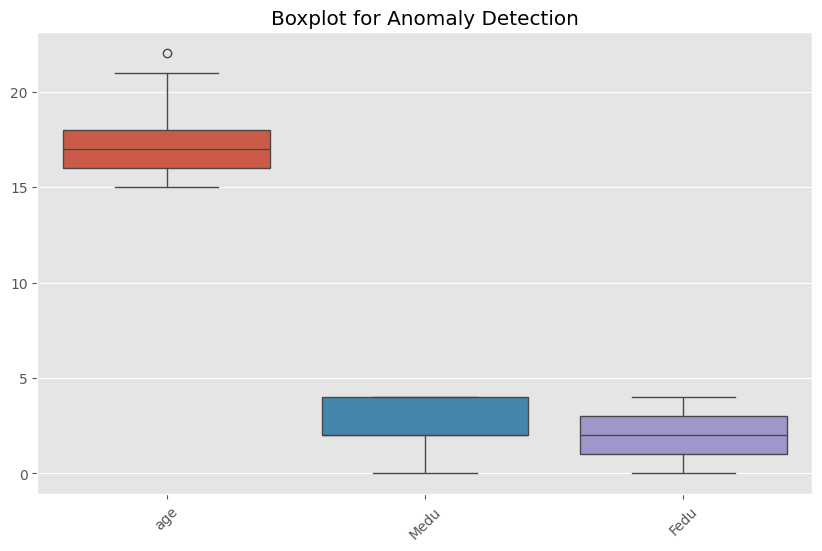

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Anomaly detection
# Detecting anomalies using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_df.drop(columns='target'))
plt.title('Boxplot for Anomaly Detection')
plt.xticks(rotation=45)
plt.show()

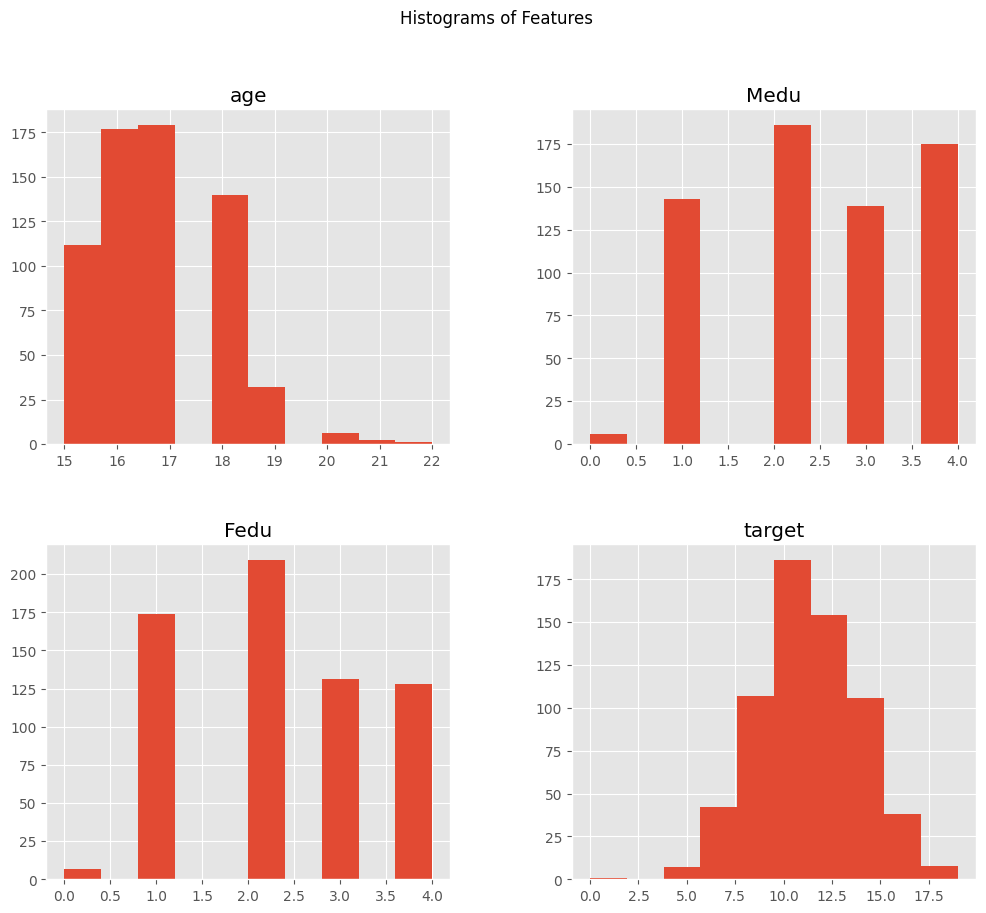

In [70]:
# 2. Data Visualization
# Histograms
X_df.hist(figsize=(12, 10))
plt.suptitle('Histograms of Features')
plt.show()

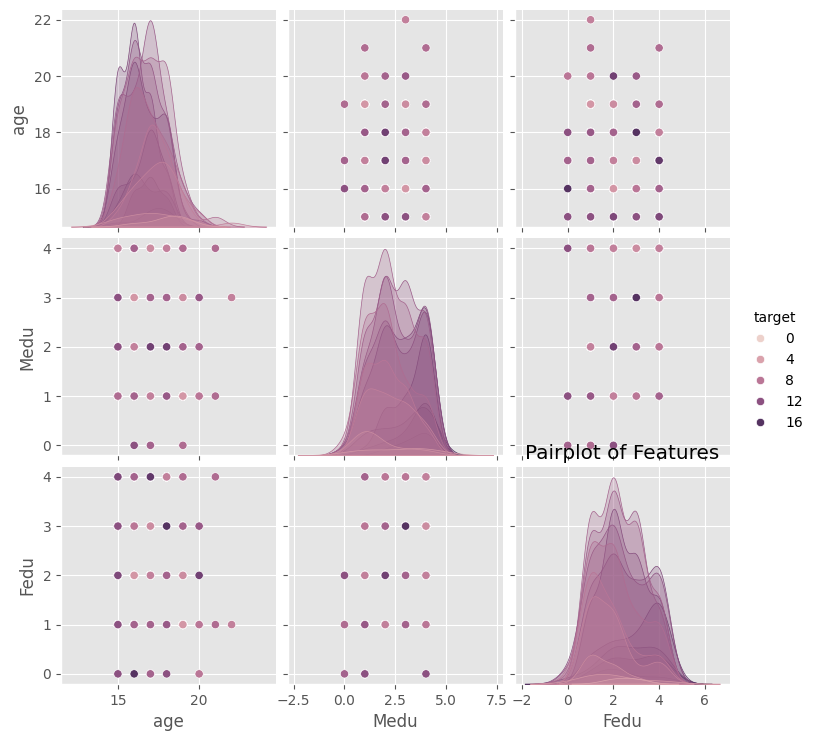

In [71]:
# Scatter plots
sns.pairplot(data=X_df, hue='target')
plt.title('Pairplot of Features')
plt.show()

<ipython-input-72-6141988a02f6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


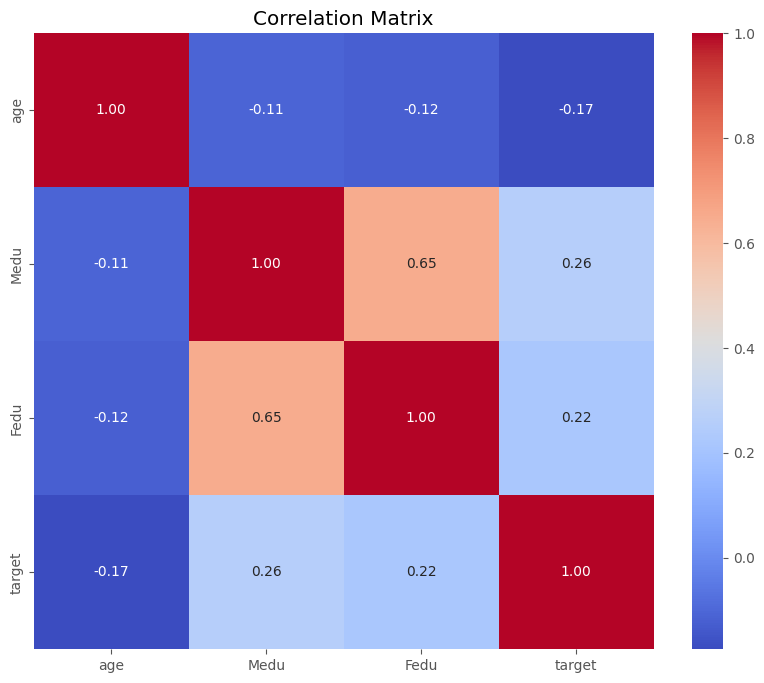

In [72]:
# Matrix plots
plt.figure(figsize=(10, 8))
sns.heatmap(X_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Accuracy: -0.04928781595596754
Accuracy: 0.04079843170231334
Accuracy: 0.0019702083547128435
Accuracy: -0.043122102489025815
Accuracy: -0.025331457101295696
Accuracy: -0.01949168020681813
Accuracy: -0.03527557498886735
Accuracy: 0.003132733256029252
Accuracy: -0.01382547260233058
Accuracy: 0.01814005582026601
Accuracy: -0.008528938210749848
Accuracy: -0.018625453789611557
Accuracy: 0.012316914663964451
Accuracy: 0.017549283761199796
Accuracy: -0.06605736252868732
Accuracy: -0.03884070176874155
Accuracy: -0.030268648796027753
Accuracy: -0.03716931141085
Accuracy: 0.03039010196386016
Accuracy: -0.059580314859427164
Accuracy: 0.0374918574065809
Accuracy: 0.027517136433234946
Accuracy: 0.01701509965193515
Accuracy: -0.054152793712012315
Accuracy: 0.019142799793648635
Accuracy: -0.016607584905498962
Accuracy: 0.011611804919981705
Accuracy: -0.04957151352850775
Accuracy: 0.003118261962221869
Accuracy: -0.02916940949560698
Accuracy: 0.03153524327833235
Accuracy: -0.0766493425121546
Accuracy: 

8
Predicted Final grade: 12.227064958539508 Data: [1 4 3 0 0] Final grade: 14
Predicted Final grade: 11.593806725286317 Data: [3 3 4 0 0] Final grade: 0
Predicted Final grade: 11.849116821818962 Data: [2 1 4 0 0] Final grade: 13
Predicted Final grade: 11.930107185279802 Data: [2 2 4 0 4] Final grade: 10
Predicted Final grade: 11.718573820067437 Data: [ 2  5  5  1 14] Final grade: 15
Predicted Final grade: 12.07082707126412 Data: [2 2 3 0 4] Final grade: 13
Predicted Final grade: 11.337608674050164 Data: [2 4 4 2 2] Final grade: 13
Predicted Final grade: 11.87695471149189 Data: [2 5 4 0 2] Final grade: 17
Predicted Final grade: 11.602512828615103 Data: [2 2 5 1 8] Final grade: 15
Predicted Final grade: 11.834651345181829 Data: [2 5 4 0 0] Final grade: 10
Predicted Final grade: 11.628877353277813 Data: [3 5 4 0 2] Final grade: 12
Predicted Final grade: 11.469023096843141 Data: [4 4 4 0 6] Final grade: 15


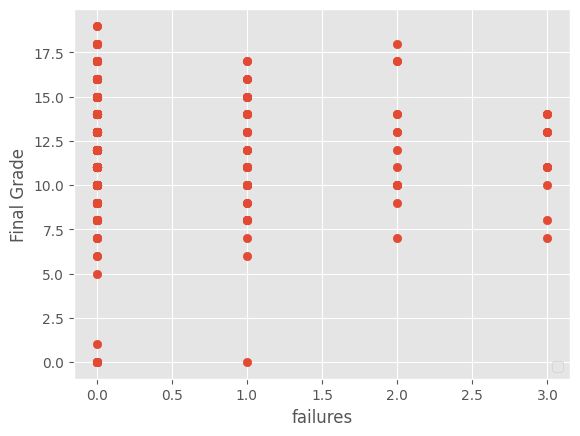

In [73]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
from ucimlrepo import fetch_ucirepo

style.use("ggplot")

# Fetch dataset
student_performance = fetch_ucirepo(id=320)

# Data (as pandas dataframes)
data = student_performance.data.features
target = student_performance.data.targets

# Select the value we want to predict
predict = "G3"

# List the variables we want to use for our predictions in this model
data = data[["studytime", "health", "famrel", "failures", "absences"]]

# Convert target to numpy array
target = np.array(target[predict])

data = shuffle(data)

x = np.array(data)
y = target

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

# Train model multiple times to find the highest accuracy
best = 0
for _ in range(200):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)
print("Highest Accuracy:", best)

# Load model
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

predictions = linear.predict(x_test)

# Print the predictions, the variables we used and the actual final grade
for i in range(len(predictions)):
    print("Predicted Final grade:", predictions[i], "Data:", x_test[i], "Final grade:", y_test[i])

# Create visualisation of the model
plot = "failures"
plt.scatter(data[plot], target)
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()


# Write a manual linear regression and compare with the above

In [18]:
import random

In [74]:
# Data (as pandas dataframes)
data = student_performance.data.features
target = student_performance.data.targets

# Select the value we want to predict
predict = "G3"

# List the variables we want to use for our predictions in this model
data = data[["studytime", "health", "famrel", "failures", "absences"]]

# Convert data and target to numpy arrays
data = np.array(data)
target = np.array(target[predict])

# Shuffle the data
data, target = shuffle(data, target)

# Split the data into training and testing sets
x_train, x_test = data[:int(0.9*len(data))], data[int(0.9*len(data)):]
y_train, y_test = target[:int(0.9*len(target))], target[int(0.9*len(target)):]

# Implementing Linear Regression manually
class LinearRegressionCustom:
    def __init__(self, learning_rate=0.001, n_iterations=1000):
        #To DO
        self.learning_rate = learning_rate
        self.iterations = n_iterations
        self.theta = np.zeros((data.shape[1],))
        self.theta_0 = np.zeros((1,))
        pass

    def fit(self, X, y):
        #To Do
        m = len(y)
        iter = self.iterations
        alpha = self.learning_rate
        for _ in range(self.iterations):
          y_hat = X.dot(self.theta) + self.theta_0
          J = (1/(2*m)) * np.sum((y_hat-y)**2)
          dtheta = (1/m) * X.T.dot(y_hat - y)
          dtheta_0 = (1/m) * np.sum(y_hat - y)
          self.theta = self.theta - alpha * dtheta
          self.theta_0 = self.theta_0 - alpha * dtheta_0
        pass

    def predict(self, X):
        #To Do
        y_pred = X.dot(self.theta) + self.theta_0
        return y_pred
        pass

class ConfusionMatrix:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        self.matrix = self._compute_confusion_matrix()

    def _compute_confusion_matrix(self):
        #To Do
        unique_classes = np.unique(np.concatenate((self.y_true, self.y_pred)))
        n_classes = len(unique_classes)
        matrix = np.zeros((n_classes, n_classes), dtype=int)

        y_true_int = self.y_true.astype(int)
        y_pred_int = self.y_pred.astype(int)

        for actual, predicted in zip(y_true_int, y_pred_int):
            matrix[actual, predicted] += 1
        return matrix
        pass

class EvaluationMetrics:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        self.confusion_matrix = ConfusionMatrix(y_true, y_pred)
        self.metrics = self._compute_metrics()

    def _compute_metrics(self):
        tp = np.diag(self.confusion_matrix.matrix)
        fp = np.sum(self.confusion_matrix.matrix , axis = 0) - tp
        fn = np.sum(self.confusion_matrix.matrix , axis = 1) - tp
        tn = np.sum(self.confusion_matrix.matrix) - tp - fp - fn

        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        fpr = fp / (fp + tn)
        fnr = fn / (fn + tp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1_score = 2 * (precision * recall) / (precision + recall)

        mse = np.mean((self.y_true - self.y_pred) ** 2)

        return {
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'FPR': fpr,
            'FNR': fnr,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1_score,
            'Mean Squared Error': mse
        }

In [82]:
# Create and train the model
model = LinearRegressionCustom()
model.fit(x_train, y_train)

# Make predictions
predictions = model.predict(x_test)

# Evaluate model
evaluation = EvaluationMetrics(y_test, predictions)
metrics = evaluation.metrics
for key, value in metrics.items():
    print(f"{key}: {value}")

# Create visualization of the model
plot = "failures"
plt.scatter(x_test[:, data.tolist().index(plot)], y_test, color='blue', label='Actual Final Grade')
plt.scatter(x_test[:, data.tolist().index(plot)], predictions, color='red', label='Predicted Final Grade')
plt.legend(loc='upper right')
#plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.title("Linear Regression Prediction")
plt.show()


Sensitivity: [0.                nan        nan        nan        nan 0.
        nan        nan 0.5        0.25       0.14285714 0.09090909
 0.27272727 0.125      0.14285714 0.         0.         0.
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan]
Specificity: [1.         1.         1.         1.         0.98461538 1.
 0.98461538 1.         0.9047619  0.90163934 0.84482759 0.7962963
 0.83333333 0.9122807  0.9137931  0.98360656 0.98333333 0.98360656
 1.         1. 

<ipython-input-74-86594ad3df6a>:85: RuntimeWarning: invalid value encountered in divide
  sensitivity = tp / (tp + fn)
<ipython-input-74-86594ad3df6a>:88: RuntimeWarning: invalid value encountered in divide
  fnr = fn / (fn + tp)
<ipython-input-74-86594ad3df6a>:89: RuntimeWarning: invalid value encountered in divide
  precision = tp / (tp + fp)
<ipython-input-74-86594ad3df6a>:90: RuntimeWarning: invalid value encountered in divide
  recall = tp / (tp + fn)
<ipython-input-74-86594ad3df6a>:91: RuntimeWarning: invalid value encountered in divide
  f1_score = 2 * (precision * recall) / (precision + recall)
